In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('train.csv')

In [2]:
# this will tell survival percentage
survival_rate = df.Survived.mean()*100
print(f'percentage of the suvivor: {survival_rate:.2}% ')

percentage of the suvivor: 3.8e+01% 


In [3]:
# AVerage Age of the passenger
average_age= df.Age.mean()
print(f'average age of the passenger : {average_age:.2}')

average age of the passenger : 3e+01


In [7]:
df['ischild']=df['Age']>18
df['ischild'].value_counts()

ischild
True     575
False    316
Name: count, dtype: int64

In [13]:
# Group by Sex and it will calculate the mean of Survived
print(df.groupby('Sex')['Survived'].mean())

# Group by IsChild to see if children really had a higher chance
print(df.groupby('ischild')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
ischild
False    0.386076
True     0.382609
Name: Survived, dtype: float64


In [15]:
# Calculate the median age
median_age = df['Age'].median()

# Fill the missing values in the Age column
df['Age'] = df['Age'].fillna(median_age)

# Verify that there are no more nulls in Age
print(df['Age'].isnull().sum())

0


In [19]:
# Creating Pivot Table
pivot = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print(pivot)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [17]:
# Create FamilySize: Siblings + Parents + Self
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Let's see the survival rate by family size
print(df.groupby('FamilySize')['Survived'].mean())

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [20]:
# Check if the name contains 'Master' or 'Dr'
df['IsMaster'] = df['Name'].str.contains('Master')
df['IsDr'] = df['Name'].str.contains('Dr\.')

print("Survival rate for 'Master':")
print(df.groupby('IsMaster')['Survived'].mean())

print("\nSurvival rate for 'Doctor':")
print(df.groupby('IsDr')['Survived'].mean())

Survival rate for 'Master':
IsMaster
False    0.374853
True     0.575000
Name: Survived, dtype: float64

Survival rate for 'Doctor':
IsDr
False    0.383484
True     0.428571
Name: Survived, dtype: float64


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\udit mehla\AppData\Local\Temp\ipykernel_19816\3414401578.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['IsDr'] = df['Name'].str.contains('Dr\.')


In [21]:
import matplotlib.pyplot as plt

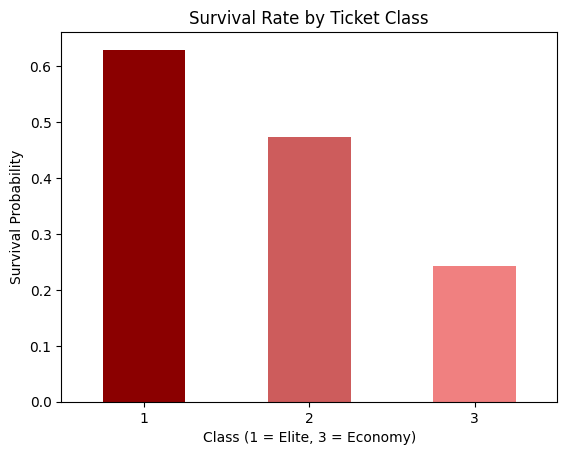

In [22]:
# Visualize survival by Class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# we are now Creating the plot
survival_by_class.plot(kind='bar', color=['darkred', 'indianred', 'lightcoral'])


plt.title('Survival Rate by Ticket Class')
plt.xlabel('Class (1 = Elite, 3 = Economy)')
plt.ylabel('Survival Probability')
plt.xticks(rotation=0)


plt.show()